In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data['CUST_ID'].nunique()

8950

In [6]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [8]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

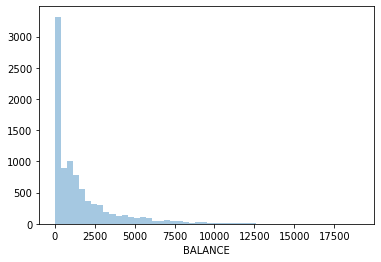

In [9]:
sns.distplot(data['BALANCE'], kde=False)

In [10]:
data['TENURE'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
10%        10.000000
20%        12.000000
30%        12.000000
40%        12.000000
50%        12.000000
60%        12.000000
70%        12.000000
80%        12.000000
90%        12.000000
max        12.000000
Name: TENURE, dtype: float64

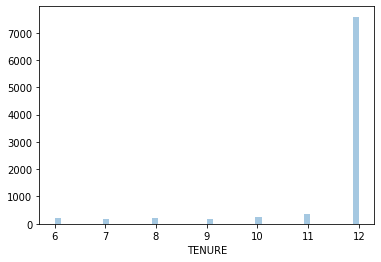

In [11]:
sns.distplot(data['TENURE'], kde=False)

In [17]:
data['CREDIT_LIMIT'] = pd.to_numeric(data['CREDIT_LIMIT'], errors='coerce')

In [18]:
data= data.dropna(subset=['CREDIT_LIMIT'])

In [20]:
data['CREDIT_LIMIT']  = data['CREDIT_LIMIT'] .astype(int)

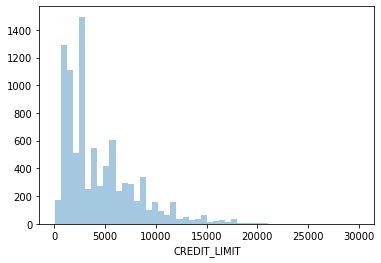

In [24]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

In [22]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8949.000000
mean      4494.448989
std       3638.815679
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

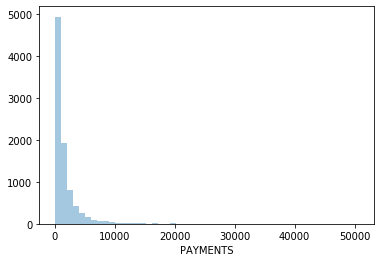

In [36]:
sns.distplot(data['PAYMENTS'], kde=False)

In [37]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8949.000000
mean      1733.336511
std       2895.168146
min          0.000000
10%        179.804140
20%        313.256456
30%        459.452021
40%        624.458211
50%        857.062706
60%       1185.794933
70%       1604.523596
80%       2314.065258
90%       3924.252866
max      50721.483360
Name: PAYMENTS, dtype: float64

In [25]:
from sklearn.cluster import KMeans

In [38]:
# Get features we need
features = ['BALANCE', 'PAYMENTS', 'TENURE', 'CREDIT_LIMIT']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,PAYMENTS,TENURE,CREDIT_LIMIT
0,40.900749,201.802084,12,1000
1,3202.467416,4103.032597,12,7000
2,2495.148862,622.066742,12,7500
3,1666.670542,0.000000,12,7500
4,817.714335,678.334763,12,1200


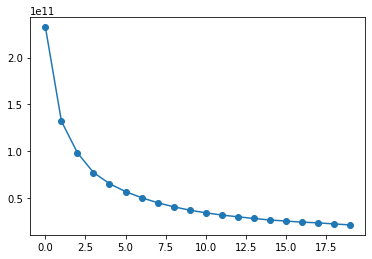

In [39]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [40]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=3, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [41]:
new_data.head()

,BALANCE,PAYMENTS,TENURE,CREDIT_LIMIT,labels
0,40.900749,201.802084,12,1000,0
1,3202.467416,4103.032597,12,7000,1
2,2495.148862,622.066742,12,7500,1
3,1666.670542,0.000000,12,7500,1
4,817.714335,678.334763,12,1200,0


In [42]:
# Cluster 0: LOW BALANCE, LOW PAYMENTS, OLD CREDIT CARD USER, AND LOW CREDIT LIMIT (PASSIVE USERS POSSIBLY BELOW MIDDLE CLASS)
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,PAYMENTS,TENURE,CREDIT_LIMIT,labels
count,6298.000000,6298.000000,6298.000000,6298.000000,6298.0
mean,863.364914,1027.132457,11.420451,2583.926008,0.0
std,925.769027,1206.008642,1.462063,1443.037180,0.0
min,0.000000,0.000000,6.000000,50.000000,0.0
25%,77.729696,299.789941,12.000000,1500.000000,0.0
50%,563.668242,596.940345,12.000000,2500.000000,0.0
75%,1359.345365,1300.413006,12.000000,3500.000000,0.0
max,4972.108843,12485.432890,12.000000,6600.000000,0.0


In [43]:
# Cluster 1: MIDDLE BALANCE, MIDDLE PAYMENTS, OLD CREDIT CARD USER, MIDDLE CREDIT LIMIT (AVERAGE USERS AND POSSIBLY MIDDLE CLASS)
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,PAYMENTS,TENURE,CREDIT_LIMIT,labels
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.0
mean,3111.006109,2433.623882,11.741673,8816.045491,1.0
std,2834.483983,2092.082823,0.953128,2958.991373,0.0
min,0.000000,0.000000,6.000000,4000.000000,1.0
25%,475.394842,993.519982,12.000000,7000.000000,1.0
50%,2600.022124,1691.841448,12.000000,8000.000000,1.0
75%,4935.784137,3281.859545,12.000000,10000.000000,1.0
max,18495.558550,10693.278430,12.000000,25000.000000,1.0


In [44]:
# Cluster 2: HIGH BALANCE, HIGH PAYMENTS, OLD CREDIT CARD USER, HIGH CREDIT LIMIT (ACTIVE USERS AND RICH)
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,PAYMENTS,TENURE,CREDIT_LIMIT,labels
count,189.000000,189.000000,189.000000,189.000000,189.0
mean,4789.746251,16143.736617,11.851852,11863.248677,2.0
std,3755.842965,7812.997950,0.721449,4940.291705,0.0
min,0.000000,5772.813158,6.000000,2500.000000,2.0
25%,1758.979585,10934.502730,12.000000,8954.000000,2.0
50%,4199.989868,13001.037150,12.000000,11500.000000,2.0
75%,6956.376540,19740.748020,12.000000,15000.000000,2.0
max,19043.138560,50721.483360,12.000000,30000.000000,2.0
